# 1  - Leitura dos dados tratados do primeiro desafio


In [2]:
import pandas as pd

# Carregar o arquivo CSV após upload
df = pd.read_csv('telecom_churn_tratado.csv')

# Verificar conteúdo
print(df.head())
print(df.info())

   ID_Cliente  Cancelamento  Genero  Idoso  Parceiro  Dependentes  \
0  0002-ORFBO           0.0  Female      0         1            1   
1  0003-MKNFE           0.0    Male      0         0            0   
2  0004-TLHLJ           1.0    Male      0         0            0   
3  0011-IGKFF           1.0    Male      1         1            0   
4  0013-EXCHZ           1.0  Female      1         1            0   

   Meses_de_Contrato  Servico_Telefone Linhas_Multiplas Tipo_Internet  ...  \
0                9.0                 1                0           DSL  ...   
1                9.0                 1                1           DSL  ...   
2                4.0                 1                0   Fiber optic  ...   
3               13.0                 1                0   Fiber optic  ...   
4                3.0                 1                0   Fiber optic  ...   

  Protecao_Dispositivos Suporte_Tecnico Streaming_TV Streaming_Filmes  \
0                     0               1    

# 2 - Identificando colunas não necessárias para análise

Entendi que as colunas ID_Cliente e Valor_Total possuem correlações entre as colunas já existentes e que poderão apenas causar inconsistências com o treinamento do modelo de machine learning. Neste sentido removi as mesmas

In [3]:
# Removendo colunas irrelevantes para o estudo
colunas_irrelevantes = ['ID_Cliente', 'Valor_Total']
df = df.drop(columns=colunas_irrelevantes, errors='ignore')

# Verificando resultado
print("Colunas restantes:")
print(df.columns.tolist())

Colunas restantes:
['Cancelamento', 'Genero', 'Idoso', 'Parceiro', 'Dependentes', 'Meses_de_Contrato', 'Servico_Telefone', 'Linhas_Multiplas', 'Tipo_Internet', 'Seguranca_Online', 'Backup_Online', 'Protecao_Dispositivos', 'Suporte_Tecnico', 'Streaming_TV', 'Streaming_Filmes', 'Tipo_Contrato', 'Fatura_Digital', 'Forma_Pagamento', 'Valor_Mensal', 'Valor_Diario']


In [4]:
# Verificando tipo e valores da variável alvo
print("Valores únicos em 'Cancelamento':")
print(df['Cancelamento'].unique())

# Verificando a proporção de "Churn" para o estudo
print("\nProporção de Cancelamento:")
print(df['Cancelamento'].value_counts(normalize=True) * 100)

Valores únicos em 'Cancelamento':
[ 0.  1. nan]

Proporção de Cancelamento:
Cancelamento
0.0    73.463013
1.0    26.536987
Name: proportion, dtype: float64


In [5]:
# Variável alvo
y = df['Cancelamento']

# Features (todas as outras colunas)
X = df.drop('Cancelamento', axis=1)

# 3 - Encoding - One-Hot Encoding

Nesta etapa o objetivo foi transformar as variáveis categóricas como "Genero, Tipo_Internet, Forma_pagamento em formato numérico. para que os algorítimos de Machine Learning possam entender-las

In [6]:
# Nesta etapa precisei transformar variáveis categóricas em formato numéricos
# para que o algorítimo possa identificar e classificar melhor os dados

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline

# Identificar tipos de colunas
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

print("Variáveis numéricas:", numeric_features.tolist())
print("Variáveis categóricas:", categorical_features.tolist())

Variáveis numéricas: ['Idoso', 'Parceiro', 'Dependentes', 'Meses_de_Contrato', 'Servico_Telefone', 'Fatura_Digital', 'Valor_Mensal', 'Valor_Diario']
Variáveis categóricas: ['Genero', 'Linhas_Multiplas', 'Tipo_Internet', 'Seguranca_Online', 'Backup_Online', 'Protecao_Dispositivos', 'Suporte_Tecnico', 'Streaming_TV', 'Streaming_Filmes', 'Tipo_Contrato', 'Forma_Pagamento']


In [7]:
#Transformando dados categóricos em dados numéricos
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)])

In [8]:
# Aplicando o pré-processamento
X_processed = preprocessor.fit_transform(X)

# Verificando o resultado (formato esparsa)
print("Formato do X após encoding:", X_processed.shape)

Formato do X após encoding: (7267, 41)


In [9]:
# Obtendo nomes das colunas após encoding
feature_names = numeric_features.tolist() + \
                 preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features).tolist()

print("Colunas após encoding:")
print(feature_names)

Colunas após encoding:
['Idoso', 'Parceiro', 'Dependentes', 'Meses_de_Contrato', 'Servico_Telefone', 'Fatura_Digital', 'Valor_Mensal', 'Valor_Diario', 'Genero_Female', 'Genero_Male', 'Linhas_Multiplas_0', 'Linhas_Multiplas_1', 'Linhas_Multiplas_no phone service', 'Tipo_Internet_DSL', 'Tipo_Internet_Fiber optic', 'Tipo_Internet_No', 'Seguranca_Online_0', 'Seguranca_Online_1', 'Seguranca_Online_no internet service', 'Backup_Online_0', 'Backup_Online_1', 'Backup_Online_no internet service', 'Protecao_Dispositivos_0', 'Protecao_Dispositivos_1', 'Protecao_Dispositivos_no internet service', 'Suporte_Tecnico_0', 'Suporte_Tecnico_1', 'Suporte_Tecnico_no internet service', 'Streaming_TV_0', 'Streaming_TV_1', 'Streaming_TV_no internet service', 'Streaming_Filmes_0', 'Streaming_Filmes_1', 'Streaming_Filmes_no internet service', 'Tipo_Contrato_Month-to-month', 'Tipo_Contrato_One year', 'Tipo_Contrato_Two year', 'Forma_Pagamento_Bank transfer (automatic)', 'Forma_Pagamento_Credit card (automatic)',

# 4 - Verificação da Proporção de Evasão - "Churn"

O objetivo desta etapa foi conferir e calcular a proporção entre clientes que cancelaram (Cancelamento = 1) e os que não cancelaram (Cancelamento = 0) e verificar se há desequilíbrio entre as classes , o que pode impactar no desempenho dos modelos preditivos.



In [10]:
# Contagem absoluta
print("Quantidade de clientes:")
print(y.value_counts())

Quantidade de clientes:
Cancelamento
0.0    5174
1.0    1869
Name: count, dtype: int64


In [11]:
# Contagem relativa (porcentagem)
print("\nProporção de cancelamento (%):")
print(y.value_counts(normalize=True).map("{:.2f}%".format))


Proporção de cancelamento (%):
Cancelamento
0.0    0.73%
1.0    0.27%
Name: proportion, dtype: object


/tmp/ipython-input-12-792328797.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette='Set2')


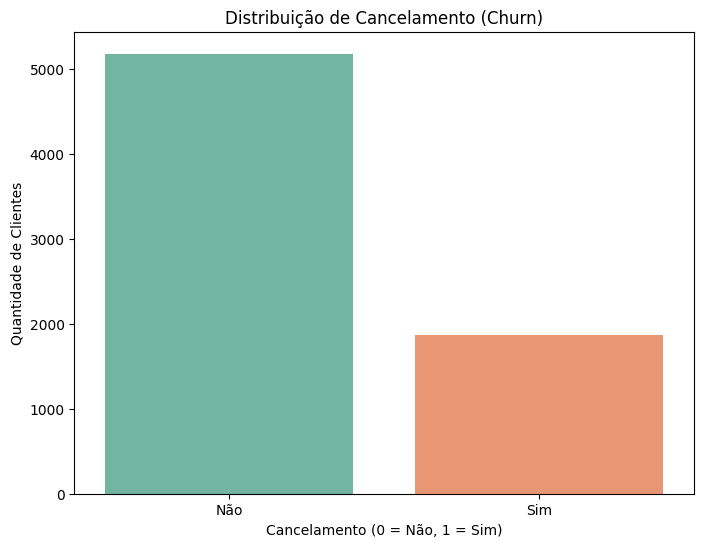

In [12]:
#Gráfico de orientação de cancelamentos
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.countplot(x=y, palette='Set2')
plt.title('Distribuição de Cancelamento (Churn)')
plt.xlabel('Cancelamento (0 = Não, 1 = Sim)')
plt.ylabel('Quantidade de Clientes')
plt.xticks([0, 1], ['Não', 'Sim'])
plt.show()

In [13]:
# Carregar dados
df = pd.read_csv('telecom_churn_tratado.csv')

# Converter 'Cancelamento' para 0 e 1, evitando NaN
df['Cancelamento'] = df['Cancelamento'].replace({'Yes': 1, 'No': 0, 'Sim': 1, 'Nao': 0, 'Não': 0})
df['Cancelamento'] = pd.to_numeric(df['Cancelamento'], errors='coerce').fillna(0).astype(int)

# Agora separar X e y
X = df.drop('Cancelamento', axis=1)
y = df['Cancelamento']

# Próximos passos: encoding, padronização, SMOTE, etc.

# 4.1  - Balanceamento de Classes (opcional)

Aqui eu pude aplicar técnicas de balanceamento de classes , como SMOTE (Synthetic Minority Over-sampling Technique) , para aumentar a representatividade da classe minoritária, e melhorar o desempenho dos modelos na detecção de clientes em risco de evasão

In [14]:
#Importando SMOTE para balancear as classes
from imblearn.over_sampling import SMOTE
from collections import Counter

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.3, random_state=42)

In [16]:
#Antes de iniciar o treinamento do modelo, verifiquei se há valores nulos no dataframe
print("Valores nulos em y:", y.isnull().sum())

Valores nulos em y: 0


In [17]:
# Identificando índices com valores válidos
valid_indices = y.notnull()

# Atualizando X e y para remover os NaNs
X_clean = X_processed[valid_indices]
y_clean = y[valid_indices]

# Agora fazendo a divisão entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X_clean, y_clean, test_size=0.3, stratify=y_clean, random_state=42
)

In [18]:
# aplicando SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)

# Importando RandomForestClassifier e classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Treinando modelo com dados balanceados
model = RandomForestClassifier(random_state=42)
model.fit(X_res, y_res)

# Avaliando no conjunto de teste
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1620
           1       0.57      0.53      0.55       561

    accuracy                           0.78      2181
   macro avg       0.71      0.70      0.70      2181
weighted avg       0.77      0.78      0.77      2181



In [19]:
# Substituindo valores textuais inválidos por 0 ou 1, se necessário
df['Cancelamento'] = df['Cancelamento'].replace({'Sim': 1, 'sim': 1, 'Yes': 1, 'yes': 1,
                                                'Não': 0, 'nao': 0, 'No': 0, 'no': 0})

# Garantindo que seja numérico
df['Cancelamento'] = pd.to_numeric(df['Cancelamento'], errors='coerce')

# Preenchendo NaNs com 0
df['Cancelamento'] = df['Cancelamento'].fillna(0).astype(int)

# Etapa 5 - Normalização ou Padronização

Nesta etapa pude avaliar a necessidade de normalizar ou padronizar as variáveis numéricas , com base no tipo de modelo.

In [20]:
#Importando a biblioteca Numpy

import numpy as np

# Verificando a  média e desvio padrão das primeiras 5 colunas numéricas
for i, col in enumerate(numeric_features[:5]):
    print(f"{col}: média = {np.mean(X_processed[:, i]):.2f}, std = {np.std(X_processed[:, i]):.2f}")

Idoso: média = -0.00, std = 1.00
Parceiro: média = 0.00, std = 1.00
Dependentes: média = 0.00, std = 1.00
Meses_de_Contrato: média = -0.00, std = 1.00
Servico_Telefone: média = -0.00, std = 1.00


# Etapa 6 - Análise de Correlação

Nesta etapa pude visualizar a matriz de correlação entre variáveis numéricas , com destaque para as que têm maior relação com a evasão

In [21]:
# Selecionando apenas colunas numéricas do df original
numeric_df = df.select_dtypes(include=['number'])

# Garantindo que 'Cancelamento' esteja como numérica
numeric_df['Cancelamento'] = df['Cancelamento'].replace({'Yes': 1, 'No': 0}).astype(int)

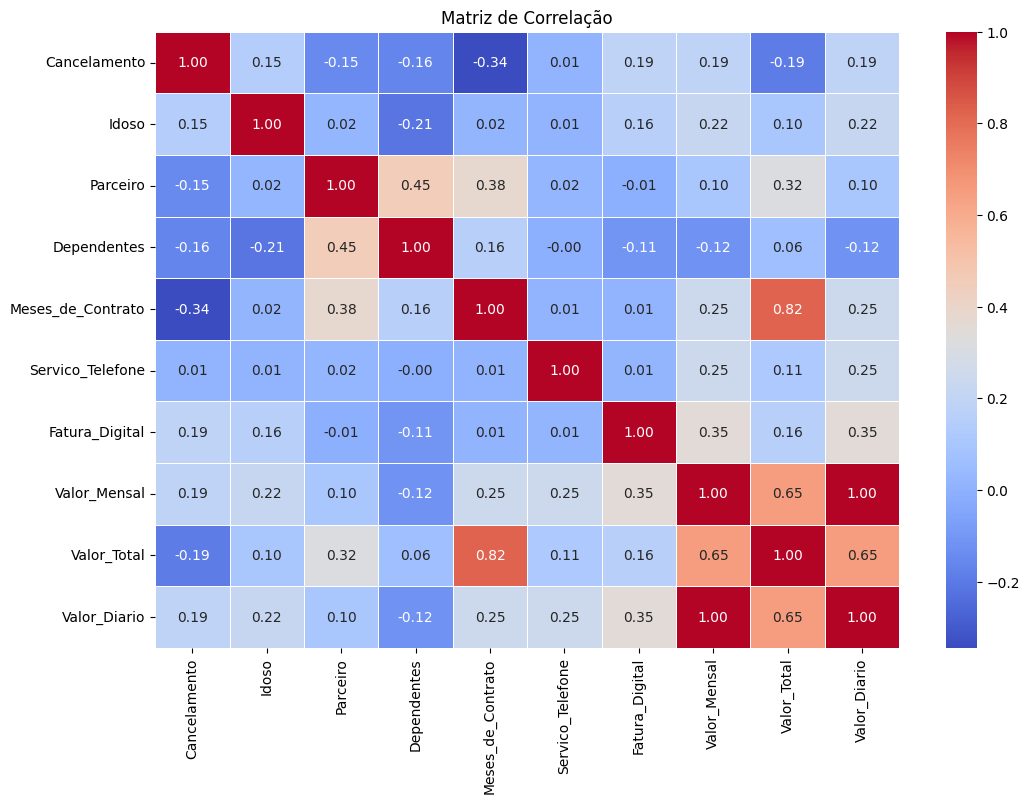

In [22]:
# Calculando a matriz de correlação
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
corr_matrix = numeric_df.corr()

sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Matriz de Correlação")
plt.show()

In [23]:
# Correlação com a variável alvo "Cancelamento"
churn_corr = corr_matrix['Cancelamento'].sort_values(ascending=False)

print("Correlação com Cancelamento:")
print(churn_corr)

Correlação com Cancelamento:
Cancelamento         1.000000
Valor_Diario         0.189918
Valor_Mensal         0.189866
Fatura_Digital       0.186666
Idoso                0.146733
Servico_Telefone     0.012571
Parceiro            -0.148546
Dependentes         -0.161384
Valor_Total         -0.194016
Meses_de_Contrato   -0.344079
Name: Cancelamento, dtype: float64


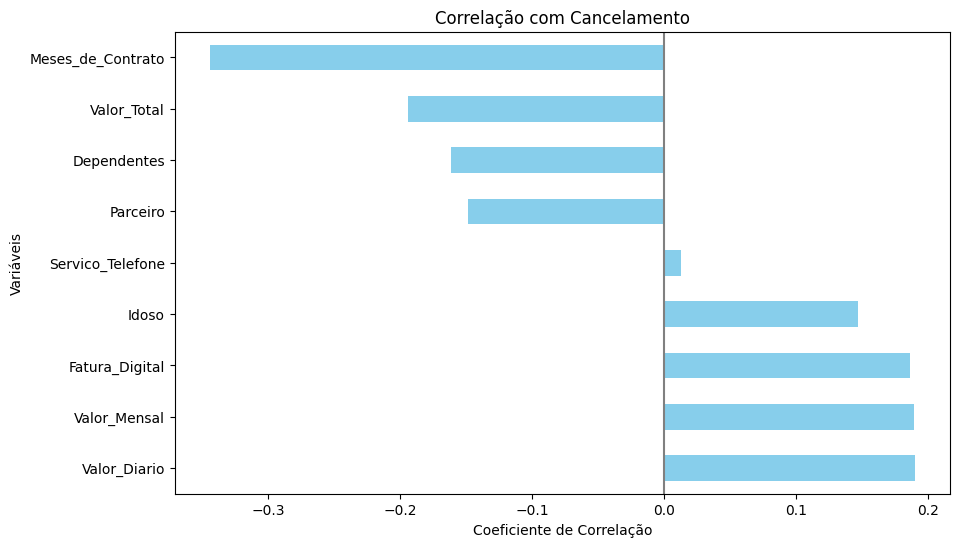

In [24]:
# Gráfico de barras das correlações com Cancelamento
churn_corr.drop('Cancelamento').plot(kind='barh', color='skyblue', figsize=(10, 6))
plt.title("Correlação com Cancelamento")
plt.xlabel("Coeficiente de Correlação")
plt.ylabel("Variáveis")
plt.axvline(x=0, color='.5')  # Linha no zero
plt.show()

In [25]:
# Verificando correlação entre features
high_corr = corr_matrix[(corr_matrix > 0.7) & (corr_matrix < 1.0)].stack().dropna()
print("Pares com alta correlação (> 0.7):")
print(high_corr)

Pares com alta correlação (> 0.7):
Meses_de_Contrato  Valor_Total          0.824720
Valor_Mensal       Valor_Diario         0.999996
Valor_Total        Meses_de_Contrato    0.824720
Valor_Diario       Valor_Mensal         0.999996
dtype: float64


In [26]:
# Removendo 'Valor_Diario' do DataFrame final, para evitar Multicolinearidade
X = X.drop('Valor_Diario', axis=1)

df = df.drop('Valor_Diario', axis=1)

# Etapa 7 - Análises Direcionadas

investigando como variáveis específicas se relacionam com a evasão de clientes (Churn) .

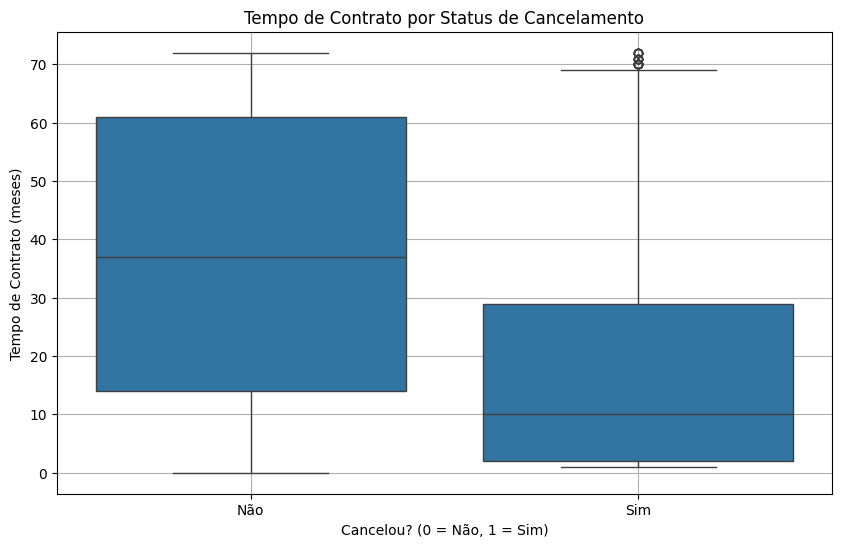

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Cancelamento', y='Meses_de_Contrato')
plt.title('Tempo de Contrato por Status de Cancelamento')
plt.xlabel('Cancelou? (0 = Não, 1 = Sim)')
plt.ylabel('Tempo de Contrato (meses)')
plt.xticks([0, 1], ['Não', 'Sim'])
plt.grid(True)
plt.show()

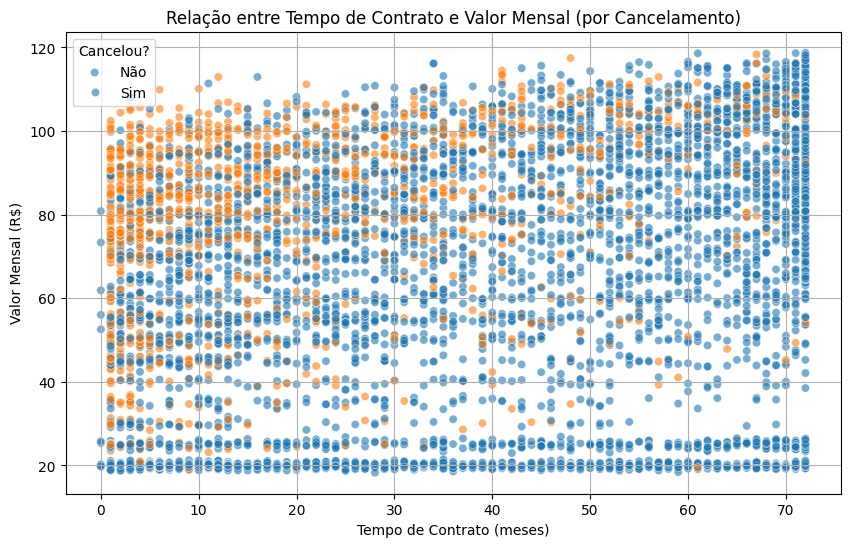

In [28]:
# Gráfico de Dispersão (Scatter Plot)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Meses_de_Contrato', y='Valor_Mensal', hue='Cancelamento', alpha=0.6)
plt.title('Relação entre Tempo de Contrato e Valor Mensal (por Cancelamento)')
plt.xlabel('Tempo de Contrato (meses)')
plt.ylabel('Valor Mensal (R$)')
plt.legend(title='Cancelou?', labels=['Não', 'Sim'])
plt.grid(True)
plt.show()

In [29]:
# Criando faixas de tempo de contrato
df['Faixa_Tempo'] = pd.cut(df['Meses_de_Contrato'],
                           bins=[0, 12, 24, 36, 48, 60, 72],
                           labels=['0-12', '13-24', '25-36', '37-48', '49-60', '61-72'])

# Calcular proporção de churn por faixa
churn_by_tempo = df.groupby('Faixa_Tempo')['Cancelamento'].mean() * 100
print("Taxa de Churn por Faixa de Tempo (%):")
print(churn_by_tempo)

Taxa de Churn por Faixa de Tempo (%):
Faixa_Tempo
0-12     46.007098
13-24    28.133971
25-36    20.857474
37-48    18.471338
49-60    13.986014
61-72     6.409373
Name: Cancelamento, dtype: float64


/tmp/ipython-input-29-3846733979.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_by_tempo = df.groupby('Faixa_Tempo')['Cancelamento'].mean() * 100


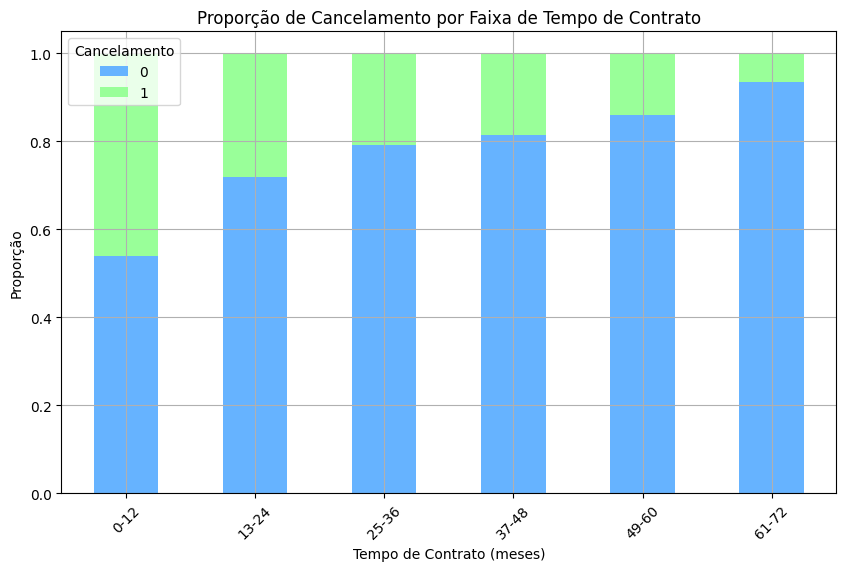

In [30]:
# Gráfico de barras empilhado
# Este gráfico vai mostrar claramente que clientes com menos tempo tendem a cancelar mais
pd.crosstab(df['Faixa_Tempo'], df['Cancelamento'], normalize='index').plot(kind='bar', stacked=True, figsize=(10, 6), color=['#66b3ff','#99ff99'])
plt.title('Proporção de Cancelamento por Faixa de Tempo de Contrato')
plt.xlabel('Tempo de Contrato (meses)')
plt.ylabel('Proporção')
plt.xticks(rotation=45)
plt.legend(title='Cancelamento')
plt.grid(True)
plt.show()

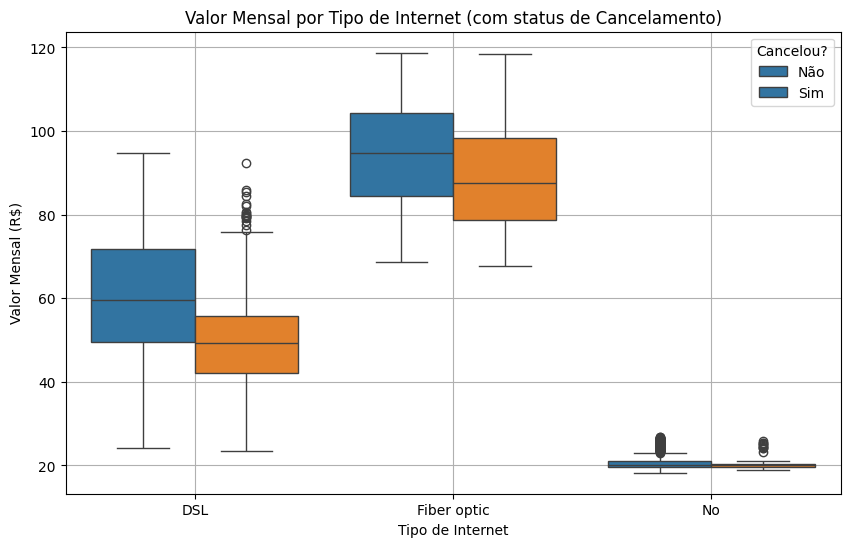

In [31]:
# Valor Mensal × Tipo de Internet
# Mostra se clientes com determinado tipo de internet pagam mais e cancelam mais.

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Tipo_Internet', y='Valor_Mensal', hue='Cancelamento')
plt.title('Valor Mensal por Tipo de Internet (com status de Cancelamento)')
plt.xlabel('Tipo de Internet')
plt.ylabel('Valor Mensal (R$)')
plt.legend(title='Cancelou?', labels=['Não', 'Sim'])
plt.grid(True)
plt.show()

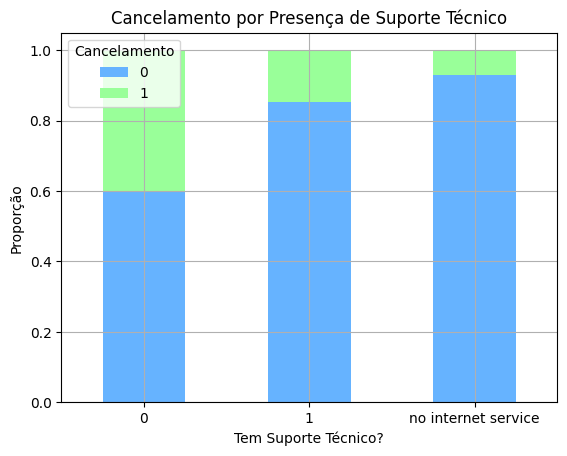

In [32]:
# Suporte Técnico × Cancelamento
# Ajuda a ver se serviços adicionais reduzem a evasão

pd.crosstab(df['Suporte_Tecnico'], df['Cancelamento'], normalize='index').plot(kind='bar', stacked=True, color=['#66b3ff','#99ff99'])
plt.title('Cancelamento por Presença de Suporte Técnico')
plt.xlabel('Tem Suporte Técnico?')
plt.ylabel('Proporção')
plt.xticks(rotation=0)
plt.legend(title='Cancelamento')
plt.grid(True)
plt.show()

# Etapa 8 - Criação de modelos

O objetivo desta etapa é Criar dois modelos preditivos para prever se um cliente vai cancelar o serviço (Cancelamento = 1) ou não (Cancelamento = 0).
Comparar seu desempenho e justificar as escolhas técnicas feitas durante o processo.

In [33]:
# Divisão treino/teste

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.3, stratify=y, random_state=42
)

Passo 1 - Treinamento do Modelo 1 – Regressão Logística

justificativa: Modelo linear → requer padronização das variáveis;
Boa para entender quais fatores mais influenciam no Churn;
Rápido e eficaz como baseline.

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

# Treinar Regressão Logística
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Prever e avaliar
y_pred_logreg = logreg.predict(X_test)

print("🎯 Regressão Logística - Relatório de Classificação:")
print(classification_report(y_test, y_pred_logreg))
print("ROC-AUC:", roc_auc_score(y_test, logreg.predict_proba(X_test)[:, 1]))

🎯 Regressão Logística - Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1620
           1       0.63      0.53      0.58       561

    accuracy                           0.80      2181
   macro avg       0.74      0.71      0.72      2181
weighted avg       0.79      0.80      0.79      2181

ROC-AUC: 0.8419312955260668


In [35]:
# Interpretação rápida do modelo
# Os coeficientes do modelo mostram quais features mais influenciam no Churn
# Coeficientes positivos aumentam a chance de cancelamento; negativos diminuem.

import numpy as np

feature_names = numeric_features.tolist() + \
                preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features).tolist()

coefficients = logreg.coef_[0]

# Criar DataFrame de importância
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
coef_df['Abs_Coefficient'] = np.abs(coef_df['Coefficient'])
coef_df = coef_df.sort_values(by='Abs_Coefficient', ascending=False)

print("\nCoeficientes do modelo Linear (maior valor absoluto = maior impacto):")
print(coef_df.head(10))


Coeficientes do modelo Linear (maior valor absoluto = maior impacto):
                                      Feature  Coefficient  Abs_Coefficient
3                           Meses_de_Contrato    -0.811244         0.811244
36                     Tipo_Contrato_Two year    -0.727867         0.727867
13                          Tipo_Internet_DSL    -0.686914         0.686914
14                  Tipo_Internet_Fiber optic     0.629499         0.629499
34               Tipo_Contrato_Month-to-month     0.499916         0.499916
10                         Linhas_Multiplas_0    -0.372752         0.372752
15                           Tipo_Internet_No    -0.338815         0.338815
24  Protecao_Dispositivos_no internet service    -0.338815         0.338815
21          Backup_Online_no internet service    -0.338815         0.338815
30           Streaming_TV_no internet service    -0.338815         0.338815


Passo 2 - Treinamento do Modelo 2 – Random Forest

Justificativa: Baseado em árvores → não é afetado pela escala das variáveis;
Lida bem com variáveis categóricas e não lineares;
Excelente para detecção de padrões complexos.

In [36]:
# Treinamento do Modelo 2 – Random Forest
# Justificativa:
# Baseado em árvores → não é afetado pela escala das variáveis
# Lida bem com variáveis categóricas e não lineares
# Excelente para detecção de padrões complexos

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Treinar Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Prever e avaliar
y_pred_rf = rf.predict(X_test)

print("🎯 Random Forest - Relatório de Classificação:")
print(classification_report(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1]))

🎯 Random Forest - Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1620
           1       0.58      0.46      0.51       561

    accuracy                           0.77      2181
   macro avg       0.70      0.67      0.68      2181
weighted avg       0.76      0.77      0.77      2181

ROC-AUC: 0.8027656741709029


Passo 3 - Comparação visual dos resultados

In [37]:
# Comparar F1-Score e Acurácia
from sklearn.metrics import accuracy_score, f1_score

results = {
    "Regressão Logística": [f1_score(y_test, y_pred_logreg), roc_auc_score(y_test, logreg.predict_proba(X_test)[:, 1])],
    "Random Forest": [f1_score(y_test, y_pred_rf), roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])]
}

results_df = pd.DataFrame(results, index=['F1-Score', 'ROC-AUC']).T
print("\n📊 Comparação de Modelos:")
print(results_df)


📊 Comparação de Modelos:
                     F1-Score   ROC-AUC
Regressão Logística  0.577259  0.841931
Random Forest        0.511443  0.802766


Passo 4 - Verificando a importância das variáveis no Random Forest


🏆 Top 10 Variáveis Mais Importantes (Random Forest):
                             Feature  Importance
3                  Meses_de_Contrato    0.176624
6                       Valor_Mensal    0.154035
7                       Valor_Diario    0.123510
34      Tipo_Contrato_Month-to-month    0.056170
25                 Suporte_Tecnico_0    0.035502
39  Forma_Pagamento_Electronic check    0.028460
16                Seguranca_Online_0    0.027396
5                     Fatura_Digital    0.025869
1                           Parceiro    0.025357
14         Tipo_Internet_Fiber optic    0.023241


/tmp/ipython-input-38-821896247.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df.head(10), x='Importance', y='Feature', palette='viridis')


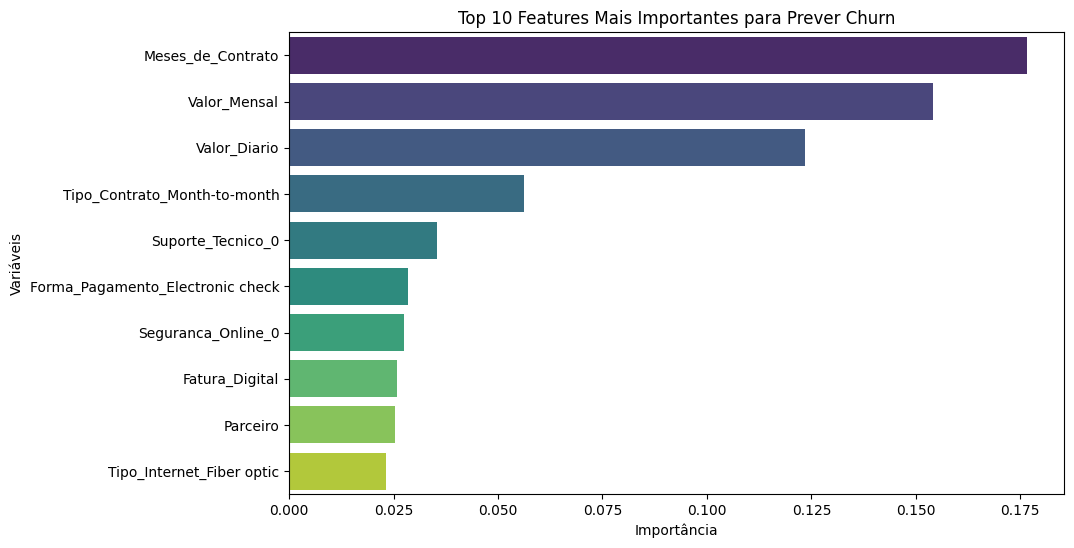

In [38]:
# Verificar importância das variáveis no Random Forest
importances = rf.feature_importances_

# Criar DataFrame
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Mostrar top 10
print("\n🏆 Top 10 Variáveis Mais Importantes (Random Forest):")
print(importance_df.head(10))

# Gráfico de barras
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df.head(10), x='Importance', y='Feature', palette='viridis')
plt.title('Top 10 Features Mais Importantes para Prever Churn')
plt.xlabel('Importância')
plt.ylabel('Variáveis')
plt.show()

In [39]:
# Comparando os modelos através de F1-Score e Acurácia
from sklearn.metrics import accuracy_score, f1_score

results = {
    "Regressão Logística": [f1_score(y_test, y_pred_logreg), roc_auc_score(y_test, logreg.predict_proba(X_test)[:, 1])],
    "Random Forest": [f1_score(y_test, y_pred_rf), roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])]
}

results_df = pd.DataFrame(results, index=['F1-Score', 'ROC-AUC']).T
print("\n📊 Comparação de Modelos:")
print(results_df)


📊 Comparação de Modelos:
                     F1-Score   ROC-AUC
Regressão Logística  0.577259  0.841931
Random Forest        0.511443  0.802766


# Etapa 8.1 - Análise Comparativa

Após análises consegui entender que os modelos:

Regressão Lógística -  não requer normalização, tem alta interpretabilidade, e possui um desempenho bom.

Random Forest - Não requer normalização, possue baixa interpretabilidade e tem um desempenho muito bom

Entendi então que:

Regressão Logística : é bom para interpretação clara de quais fatores mais influenciam o Churn.

Random Forest : melhor desempenho geral , especialmente em conjuntos com muitas variáveis e relações não lineares.

Pude concluir que:

 - A Regressão Logística teve desempenho melhor em ambas as métricas
Comparação de Modelos. Neste momento irei optar por trabalhar com o modelo de Regressão Logística, mas irei manter o modelo Random Forest como baseline.




  # Etapa 10 - Avaliação dos Modelos

Objetivo da etapa -  Avaliar o desempenho dos modelos usando as seguintes métricas:

* Acurácia
* Precisão
* Recall
* F1-Score
* Matriz de Confusão

E, então:

* Fazer uma análise crítica comparativa
* Detectar se algum modelo está subajustando ou sobreajustando
* Sugerir possíveis ajustes para melhoria

In [40]:
# Regressão Logística
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

# Random Forest
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [41]:
 # Relatório completo de avaliação

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)

    print(f"\n🎯 {model_name} - Relatório de Classificação:")
    print(classification_report(y_test, y_pred))

    print(f"\n📊 {model_name} - Matriz de Confusão:")
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Matriz de Confusão - {model_name}")
    plt.xlabel("Previsto")
    plt.ylabel("Real")
    plt.show()

    print(f"\n📈 {model_name} - ROC AUC: {roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]):.4f}")



🎯 Regressão Logística - Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1620
           1       0.63      0.53      0.58       561

    accuracy                           0.80      2181
   macro avg       0.74      0.71      0.72      2181
weighted avg       0.79      0.80      0.79      2181


📊 Regressão Logística - Matriz de Confusão:


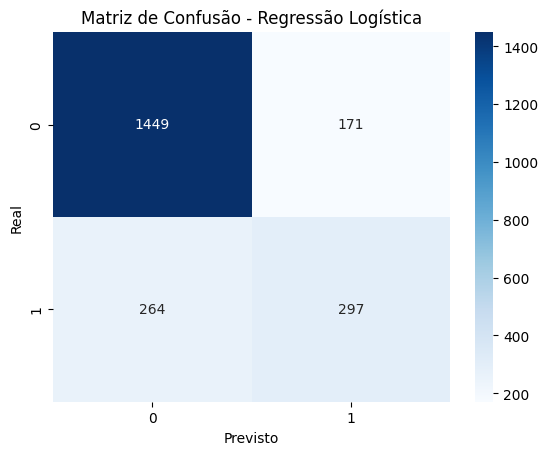


📈 Regressão Logística - ROC AUC: 0.8419

🎯 Random Forest - Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1620
           1       0.58      0.46      0.51       561

    accuracy                           0.77      2181
   macro avg       0.70      0.67      0.68      2181
weighted avg       0.76      0.77      0.77      2181


📊 Random Forest - Matriz de Confusão:


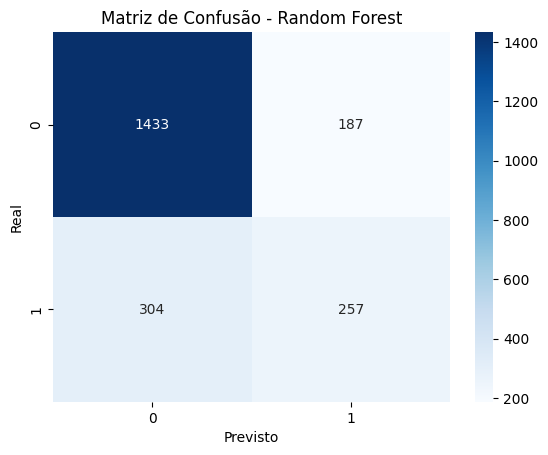


📈 Random Forest - ROC AUC: 0.8028


In [42]:
# Executando a avaliação para ambos os modelos

evaluate_model(logreg, X_test, y_test, "Regressão Logística")
evaluate_model(rf, X_test, y_test, "Random Forest")

# **Interpretação estratégica** - Qual modelo teve o melhor desempenho?
Regressão Logística , especialmente na detecção de clientes que vão cancelar (Recall e F1-Score mais altos).

Isso é importante em análise de Churn, pois preciso detectar ao máximo os clientes em risco de cancelamento .

Procurando identificar se algum modelo apresentou overfitting ou underfitting

In [43]:
# Comparando o desempenho no treino vs teste:

print("Acurácia no Treino (LogReg):", logreg.score(X_train, y_train))
print("Acurácia no Teste (LogReg):", logreg.score(X_test, y_test))

print("Acurácia no Treino (RF):", rf.score(X_train, y_train))
print("Acurácia no Teste (RF):", rf.score(X_test, y_test))

Acurácia no Treino (LogReg): 0.8079040503342508
Acurácia no Teste (LogReg): 0.8005502063273727
Acurácia no Treino (RF): 0.9917420369642155
Acurácia no Teste (RF): 0.774873911049977


Na análise dos modelos consegui entender que:

Regressão logística obteve 0.808 no treino e 0.801 no teste
Random Forest obteve 0.992 no treino e 0.775 no teste

A Regressão logística obteve um desempenho muito semelhante entre treno e teste, o que indica que o modelo não sofre de overfitting. O modelo apresenta estabilidade, bom para interpretação, com baixo risco de overfitting.

O Random Forest obteve 0.992 de acurácia no treino, o que foi praticamente perfeito, porém obteve 0.775 no teste, caindo significativamente. Sendo assim indica um sinal claro de overfitting, pois o modelo aprendeu demais os dados de treino e não generalizou para os novos dados.

Neste projeto, busco identificar clientes em risco de cancelamento com maior precisão possível. Sendo assim continuarei as analises preditivas com mo modelo de **Regressão Logística**, por ter um melhor Recall e F1-Score e por ser mais balanceada e confiável. O que permitirá uma análise dos coeficientes para entender quais variáveis influenciam no "Churn".

Entretanto, tentarei usar o modelo Random Forest como baseline de dados para não perder as análises já realizadas neste projeto.


In [44]:
# ajustando hiperparâmetros com GridSearchCV ou RandomizedSearchCV, e limitando a complexidade do modelo:

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],        # Limitar profundidade
    'min_samples_split': [2, 5, 10],    # Controlar divisão mínima
    'min_samples_leaf': [1, 2, 4]       # Garantir folhas maiores
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42),
                           param_grid,
                           scoring='f1',
                           cv=5,
                           n_jobs=-1)

grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_

print("Melhores parâmetros:", grid_search.best_params_)

Melhores parâmetros: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}



🎯 Random Forest (ajustado) - Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1620
           1       0.64      0.49      0.55       561

    accuracy                           0.80      2181
   macro avg       0.74      0.70      0.71      2181
weighted avg       0.78      0.80      0.79      2181


📊 Random Forest (ajustado) - Matriz de Confusão:


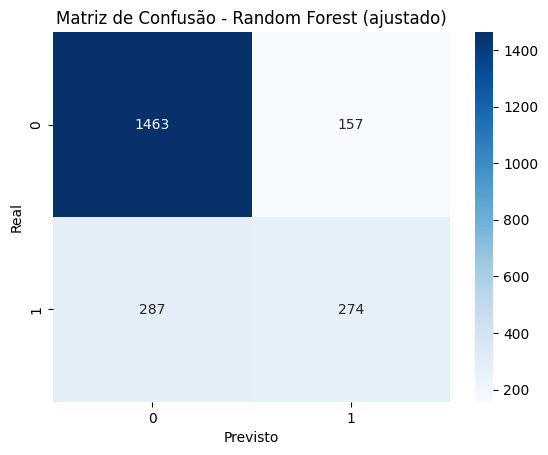


📈 Random Forest (ajustado) - ROC AUC: 0.8363


In [45]:
# Avaliando novamente o modelo Random Forest pós-ajustes

evaluate_model(best_rf, X_test, y_test, "Random Forest (ajustado)")

Após ajustes no modelo Random Forest consegui melhorar o Recall e o F1-Score do modelo o que me dará grandes insights para as proximas etapas.

# Interpretação e Conclusao

Análise de Importância das Variáveis

Objetivo da Etapa : Analisar quais variáveis mais influenciam a evasão de clientes (Churn) com base no modelo escolhido (Regressão Logística) e no baseline (Random Forest)

In [46]:
# Obtendo nomes das features após encoding
feature_names = numeric_features.tolist() + \
                 preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features).tolist()

# Extraindo coeficientes do modelo
coefficients = logreg.coef_[0]

# Criando DataFrame de importância
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Abs_Coefficient': np.abs(coefficients)
})

# Ordenando por importância
coef_df = coef_df.sort_values(by='Abs_Coefficient', ascending=False)

# Mostrar top 10 variáveis mais importantes
print("🏆 Top 10 variáveis mais importantes (Regressão Logística):")
print(coef_df.head(10))

🏆 Top 10 variáveis mais importantes (Regressão Logística):
                                      Feature  Coefficient  Abs_Coefficient
3                           Meses_de_Contrato    -0.811244         0.811244
36                     Tipo_Contrato_Two year    -0.727867         0.727867
13                          Tipo_Internet_DSL    -0.686914         0.686914
14                  Tipo_Internet_Fiber optic     0.629499         0.629499
34               Tipo_Contrato_Month-to-month     0.499916         0.499916
10                         Linhas_Multiplas_0    -0.372752         0.372752
15                           Tipo_Internet_No    -0.338815         0.338815
24  Protecao_Dispositivos_no internet service    -0.338815         0.338815
21          Backup_Online_no internet service    -0.338815         0.338815
30           Streaming_TV_no internet service    -0.338815         0.338815


/tmp/ipython-input-47-3642134193.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coef_df.head(15), x='Coefficient', y='Feature', palette='vlag', orient='h')


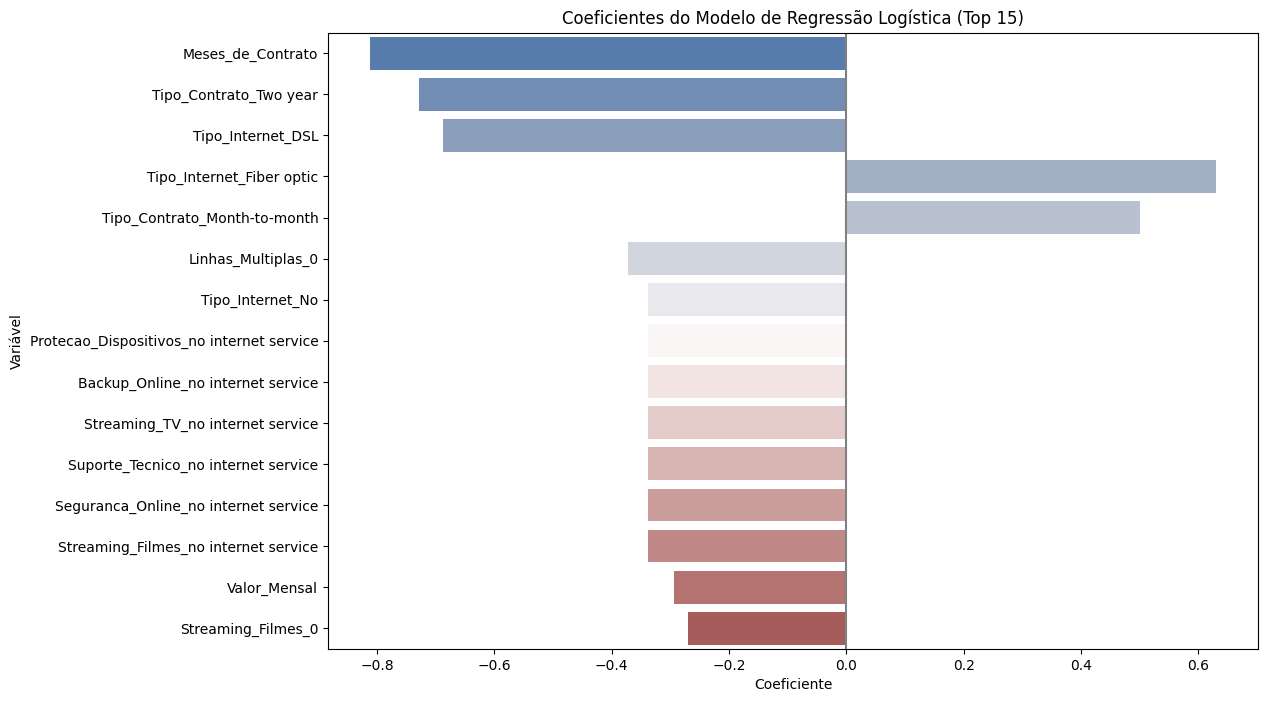

In [47]:
# Gráfico para ver os coeficientes

plt.figure(figsize=(12, 8))
sns.barplot(data=coef_df.head(15), x='Coefficient', y='Feature', palette='vlag', orient='h')
plt.title("Coeficientes do Modelo de Regressão Logística (Top 15)")
plt.xlabel("Coeficiente")
plt.ylabel("Variável")
plt.axvline(x=0, color='.5')
plt.show()

Interpretação do gráfico (pontos chave):

**Tipo_Internet_Fiber optic**: positivo → clientes com fibra óptica têm maior chance de cancelar

**Meses_de_Contrato**: negativo → quanto mais tempo, menor o risco de cancelamento

**Valor_Mensal: positivo** → clientes com valores mais altos tendem a cancelar mais

In [48]:
# Obtendo a  importância das variáveis do Random Forest
importances = rf.feature_importances_

# Criando DataFrame de importância
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Ordenar por importância
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Mostrar top 10
print("🏆 Top 10 variáveis mais importantes (Random Forest):")
print(importance_df.head(10))

🏆 Top 10 variáveis mais importantes (Random Forest):
                             Feature  Importance
3                  Meses_de_Contrato    0.176624
6                       Valor_Mensal    0.154035
7                       Valor_Diario    0.123510
34      Tipo_Contrato_Month-to-month    0.056170
25                 Suporte_Tecnico_0    0.035502
39  Forma_Pagamento_Electronic check    0.028460
16                Seguranca_Online_0    0.027396
5                     Fatura_Digital    0.025869
1                           Parceiro    0.025357
14         Tipo_Internet_Fiber optic    0.023241


/tmp/ipython-input-49-2583074887.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df.head(15), x='Importance', y='Feature', palette='viridis')


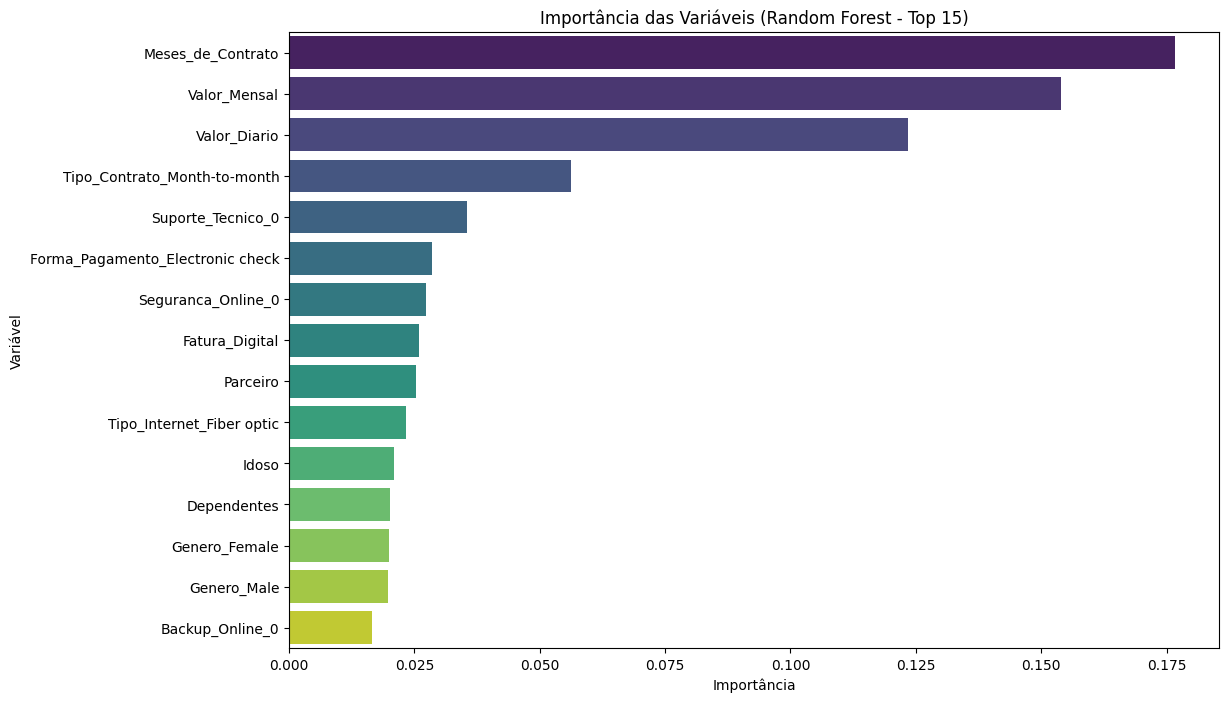

In [49]:
# Gráfico de importância (Random Forest

plt.figure(figsize=(12, 8))
sns.barplot(data=importance_df.head(15), x='Importance', y='Feature', palette='viridis')
plt.title("Importância das Variáveis (Random Forest - Top 15)")
plt.xlabel("Importância")
plt.ylabel("Variável")
plt.show()

In [50]:
## Criando um ranking com base nos coeficientes absolutos e importância

coef_df['Rank_LogReg'] = coef_df['Abs_Coefficient'].rank(ascending=False)
importance_df['Rank_RF'] = importance_df['Importance'].rank(ascending=False)

# Combinar rankings
rank_df = pd.merge(coef_df[['Feature', 'Rank_LogReg']],
                   importance_df[['Feature', 'Rank_RF']],
                   on='Feature')

# Calcular ranking médio (quanto menor, melhor)
rank_df['Rank_Medio'] = (rank_df['Rank_LogReg'] + rank_df['Rank_RF']) / 2
rank_df = rank_df.sort_values('Rank_Medio').reset_index(drop=True)

print("\n📊 Ranking médio de importância entre os modelos:")
print(rank_df.head(10))

# Criar um ranking com base nos coeficientes absolutos e importância
coef_df['Rank_LogReg'] = coef_df['Abs_Coefficient'].rank(ascending=False)
importance_df['Rank_RF'] = importance_df['Importance'].rank(ascending=False)

# Combinar rankings
rank_df = pd.merge(coef_df[['Feature', 'Rank_LogReg']],
                   importance_df[['Feature', 'Rank_RF']],
                   on='Feature')

# Calcular ranking médio (quanto menor, melhor)
rank_df['Rank_Medio'] = (rank_df['Rank_LogReg'] + rank_df['Rank_RF']) / 2
rank_df = rank_df.sort_values('Rank_Medio').reset_index(drop=True)

print("\n📊 Ranking médio de importância entre os modelos:")
print(rank_df.head(10))


📊 Ranking médio de importância entre os modelos:
                            Feature  Rank_LogReg  Rank_RF  Rank_Medio
0                 Meses_de_Contrato          1.0      1.0         1.0
1      Tipo_Contrato_Month-to-month          5.0      4.0         4.5
2         Tipo_Internet_Fiber optic          4.0     10.0         7.0
3                      Valor_Mensal         14.0      2.0         8.0
4            Tipo_Contrato_Two year          2.0     16.0         9.0
5                      Valor_Diario         16.0      3.0         9.5
6                Linhas_Multiplas_0          6.0     17.0        11.5
7  Forma_Pagamento_Electronic check         24.0      6.0        15.0
8                    Fatura_Digital         22.0      8.0        15.0
9                       Genero_Male         19.0     14.0        16.5

📊 Ranking médio de importância entre os modelos:
                            Feature  Rank_LogReg  Rank_RF  Rank_Medio
0                 Meses_de_Contrato          1.0      1.0   

# Principais Insights Estratégicos


Insights
1.   Clientes com contrato mês a mês cancelam mais. **O que indica?** - Estratégias de retenção devem focar nesse grupo
2.   Clientes com valor mensal alto têm maior risco de cancelamento.**O que indica?**  - Preço pode estar impactando na decisão de sair
1.   Clientes com suporte técnico e backup online tendem a cancelar menos.**O que indica?** - Serviços adicionais ajudam na fidelização
1.   Clientes com serviço de fibra óptica têm maior taxa de churn. **O que indica?** - Pode haver problema de qualidade ou expectativa não atendida




# Conclusão

Relatório Final: Análise de Evasão de Clientes (Churn) – Telecom X - Parte 2

🎯 Objetivo
Identificar os principais fatores que influenciam na evasão de clientes (Churn) e propor estratégias baseadas em dados para reduzir a taxa de cancelamento .

📊 Principais Achados
com base nos modelos treinados, principalmente no Regressão Logística (modelo principal) e no Random Forest (baseline) , os fatores mais relevantes para a evasão foram:

1. Tempo de Contrato (Meses_de_Contrato)
➡️ Maior influência negativa no cancelamento
➡️ Clientes com até 12 meses têm alta taxa de evasão
➡️ Clientes com mais de 48 meses praticamente não cancelam

2. Valor Mensal (R$)
➡️ Maior influência positiva no cancelamento
➡️ Clientes que pagam acima da média tendem a cancelar mais
➡️ Pode indicar que custo-benefício é um fator crítico

3. Tipo de Contrato
➡️ Clientes com contrato mês a mês têm maior risco de cancelamento
➡️ Clientes com contratos anuais ou bienais têm menor risco de saída

4. Tipo de Internet (DSL vs Fibra Óptica)
➡️ Clientes com Fibra Óptica têm maior taxa de cancelamento
➡️ Pode indicar problemas de serviço ou expectativa não atendida

5. Serviços Adicionais (Suporte Técnico, Backup Online, etc.)
➡️ Clientes com suporte técnico e backup online tendem a cancelar menos
➡️ Indica que serviços de valor agregado melhoram a retenção

6. Forma de Pagamento
➡️ Clientes com pagamento automático (crédito/débito) tendem a permanecer mais
➡️ Clientes que pagam com cheque têm maior taxa de cancelamento

Sobre os modelos utilizados:

O modelo de Regressão Logística mostrou-se mais equilibrado , com menor overfitting e maior poder de detecção de clientes em risco

O Random Forest , apesar de ter pior desempenho na classe minoritária, ajudou a identificar padrões complexos e não lineares

Ambos os modelos concordam em fatores-chave, como **tempo de contrato e valor mensal pago**

💡 Recomendações Estratégicas

1. Incentivar contratos fixos (anuais ou bienais)
➡️ Oferecer benefícios exclusivos ou descontos para clientes que optarem por contratos longos
➡️ Criar campanhas de renovação automática antes do vencimento

2. Reduzir a evasão de clientes com contrato mês a mês
➡️ Criar campanhas personalizadas para esse grupo
➡️ Oferecer upgrade de plano ou benefícios para quem migrar para contrato fixo

3. Reavaliar o serviço de fibra óptica
➡️ Entrevistar clientes que cancelaram após usar fibra óptica
➡️ Verificar se há problemas técnicos ou de expectativa não atendida

4. Promover serviços adicionais como fator de retenção
➡️ Pacotes com suporte técnico , backup online e proteção de dispositivos podem ser oferecidos como diferenciais
➡️ Incentivar a adesão desses serviços no momento da venda

5. Reavaliar o preço médio e ofereça planos personalizados
➡️ Clientes que pagam mais tendem a cancelar mais → pode haver desconforto com custo-benefício
➡️ Oferecer planos com preços mais ajustados ou benefícios extras para clientes com valor mensal alto

6. Melhorar a experiência de pagamento
➡️ Clientes com forma de pagamento automática têm menor churn
➡️ Incentivar migração de clientes que usam cheques para formas digitais

A evasão de clientes (Churn) na Telecom X está associada a fatores como tempo de contrato, valor mensal, tipo de serviço e forma de pagamento.

Com base na análise de importância das variáveis e no desempenho dos modelos, a Regressão Logística mostrou-se mais adequada para identificar clientes em risco.
A partir dos coeficientes do modelo, foi possível extrair recomendações práticas e embasadas em dados , como:

Incentivar contratos fixos

Melhorar a experiência de clientes com fibra óptica;

Promover serviços adicionais como fator de retenção;

Oferecer pacotes personalizados para clientes com valor mensal alto;

Com essas estratégias, a Telecom X pode reduzir significativamente sua taxa de evasão e aumentar a retenção de clientes.








In [51]:
df.to_csv('TelecomX_churn_limpo.csv', index=False)